In [1]:
# Install required packages
!pip install pyspark
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=82bf3037b061034f20a1b3b1a86e63a481681917666b4e32eb0dcd30fca4d419
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.functions import sum as spark_sum
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [12]:
# Create a SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

# Read the dataset into a DataFrame
df = spark.read.csv("dataset.csv", header=True, inferSchema=True)

# Select the columns of interest (publish_time, title, and view)
selected_df = df.select("publish_time", "title", "view")

# Group by title and sum the views
grouped_df = selected_df.groupBy("title").agg(spark_sum("view").alias("view_count"))

# Convert DataFrame to Pandas DataFrame for wordcloud generation
pandas_df = grouped_df.toPandas()

font_path = "NanumGothic.ttf"  # Path to Nanum Gothic font
wordcloud = WordCloud(width=800, height=400, background_color="white", font_path=font_path).generate_from_frequencies(pandas_df.set_index("title").to_dict()["view_count"])


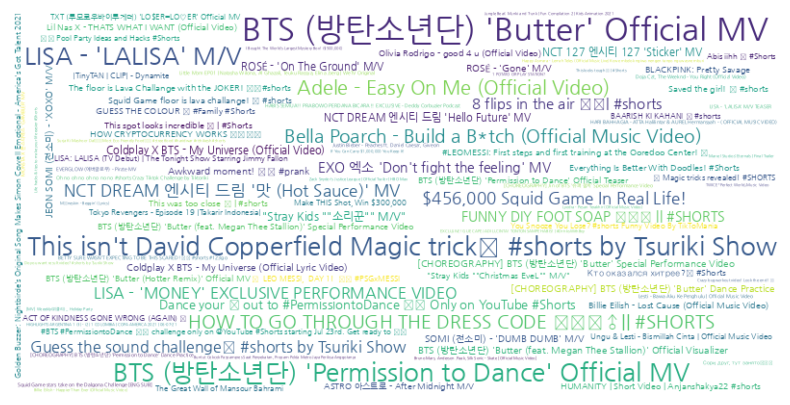

In [13]:
# Plot the wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()